# Aufgabe:

Ein Computerhersteller fertigt sowohl PCs als auch Laptops an, wobei sein Gewinn pro PC 600 Euro und pro Laptop 500 Euro beträgt. Alle Geräte werden mit einem DVD-Laufwerk ausgerüstet, wobei der Lieferant von DVD-Laufwerken höchstens 2000 Laufwerke pro Tag verbindlich zusagen kann. Der Computerhersteller benötigt für den Zusammenbau eines Laptops 2 h und damit doppelt so lange wie für einen PC. Für den Test eines PCs veranschlagt der Hersteller 1 h, für den Test von Laptops nur 1/2 h. Die personelle Gesamtkapazität für den Zusammenbau beträgt  5000 h/Tag, für das Testen 1500 h/Tag. Aufgrund von Marktprognosen sind täglich höchstens 1250 PCs und 1500 Laptops absetzbar. 

In [157]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import sys
!{sys.executable} -m pip install numpy

You should consider upgrading via the 'c:\users\rober\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


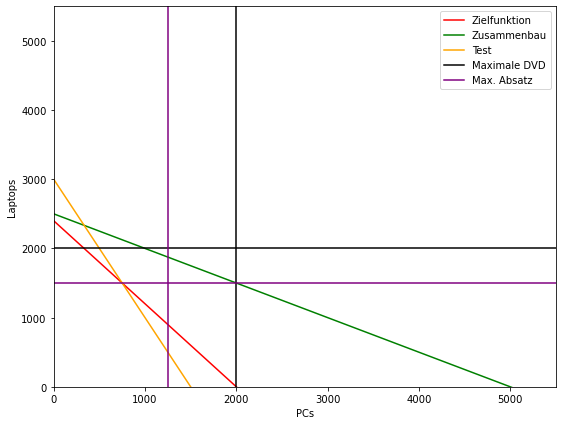

In [159]:
#  Funktionen Festlegen
L = (1/500)*(1200000) + (-6/5) * P  # Schon Optimierte Zielfunktion!
P = np.array(range(10000))    # Wertebereich für P festlegen
L1 = 2500 -  0.5 * P   # Zusammenbau
L2 = 3000 - 2*P         # Test

# Create the plot
plt.figure(figsize=(9,7))
plt.xlim(0, 5500)
plt.ylim(0, 5500)


# Functions
plt.plot(P, L, color = "red", label = "Zielfunktion")
plt.plot(P, L1, color = "green", label = "Zusammenbau")
plt.plot(P, L2, color = "orange", label = "Test")

# Single Constraints
plt.axvline(x=2000, color = "black", label = "Maximale DVD")
plt.axhline(y=2000, color = "black")
plt.axvline(x=1250, color = "purple", label = "Max. Absatz")
plt.axhline(y=1500, color = "purple")

# Labels
plt.xlabel("PCs")
plt.ylabel("Laptops")
plt.legend()

# Show the plot
plt.show()

# Um auf die Maximale Lösung zu kommen!

Einfach Unten bei **"Objective Function"** die Zielfunktion eingeben

Danach jedes Constraint eingeben

Glückwunsch, du hast dir grade 10 Stunden arbeit gespart

![alt text](https://townsquare.media/site/442/files/2012/12/the_great_gatsby_trailer.jpg?w=980&q=75 "")

In [145]:
# Pulp ist unser Lineare Optimierungs Solver
import pulp as p 
  
# Problem erstellen
Lp_prob = p.LpProblem('Problem', p.LpMaximize)
  
# Create problem Variables  
P = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
L = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0 
  
# Objective Function 
Lp_prob += 600 * P + 500 * L    
  
# Constraints: 
Lp_prob += P <= 2000
Lp_prob += L <= 2000
Lp_prob += 2*L + 1*P <= 5000          # Test
Lp_prob += 0.5*L + 1*P <= 1500
Lp_prob += P <= 1250
Lp_prob += L <= 1500
  
# Display the problem 
print(Lp_prob) 
  
status = Lp_prob.solve()   # Solver 
print(p.LpStatus[status])   # The solution status  
    
# Printing the final solution 
print(p.value(P), p.value(L), p.value(Lp_prob.objective))

Problem:
MAXIMIZE
600*x + 500*y + 0
SUBJECT TO
_C1: x <= 2000

_C2: y <= 2000

_C3: x + 2 y <= 5000

_C4: x + 0.5 y <= 1500

_C5: x <= 1250

_C6: y <= 1500

VARIABLES
x Continuous
y Continuous

Optimal
750.0 1500.0 1200000.0
